This is a capstone project from Google Advanced Data Analytics Professional Certificate program.

# Project detail

- HR department of company A wants to improve their employee's turnover rate.
- This project goal is providing data-driving suggestion to them by
    - analytics
    - build a model which predicts whether or not an employee will leave the company.
    - Identify factors that lead their leaving. 

# Plan phase in PACE strategy

In [10]:
# Install packages
# Run this when starting a new session in this notebook
# !pip install xgboost

In [313]:
# Import packages
# for data manipuration
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for regression analysis

# for ML analysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# for save results
import pickle

# display max columns in notebook
pd.set_option('display.max_columns',None)

In [12]:
# current directory
%pwd

'/home/jovyan'

In [13]:
# Load dataset to a dataframe
path = '/home/jovyan/Data/'
df0 = pd.read_csv(path + "HR_capstone_dataset.csv")

In [14]:
# display data
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [15]:
df0.info(),df0.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(None, (14999, 10))

In [16]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
# target column 'left';  0:stay 1:leave
df0['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [18]:
# percentage
df0['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [19]:
# people who stay
df0[df0['left']==0].describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [20]:
# people who left
df0[df0['left']==1].describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


Seems some tendencies between stay and left. Explor more details in Data Exploration.

In [21]:
# column names check
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [75]:
df0.columns = df0.columns.str.lower()
df0 = df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                          'time_spend_company':'length_of_service'})
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
length_of_service          int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [23]:
# check for missing values
df0.isna().sum().sum()

0

In [24]:
# check for duplicates
df0.duplicated().sum()

3008

In [25]:
# Inspect some duplicated rows
df0[df0.duplicated(keep=False)].sort_values(by=['satisfaction_level','last_evaluation','average_monthly_hours'])

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,length_of_service,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
13089,1.00,0.88,6,201,4,0,0,0,technical,low
11375,1.00,0.93,5,167,3,0,0,0,sales,medium
13586,1.00,0.93,5,167,3,0,0,0,sales,medium
10691,1.00,0.93,5,231,2,0,0,0,marketing,medium


In [26]:
# drop duplicates and save to a new dataframe
df = df0.drop_duplicates()
df.shape

(11991, 10)

In [27]:
# check the target variable with cleaned data
df['left'].value_counts(),df['left'].value_counts(normalize=True)

(left
 0    10000
 1     1991
 Name: count, dtype: int64,
 left
 0    0.833959
 1    0.166041
 Name: proportion, dtype: float64)

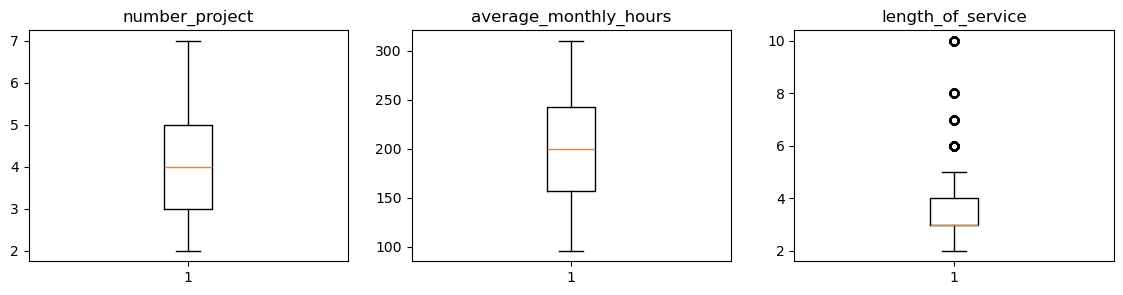

In [28]:
# check for outliers in boxplots
num_columns =['number_project','average_monthly_hours','length_of_service']
fig,axes = plt.subplots(1,3,figsize=(14,3))

for i in range(len(num_columns)):
    axes[i].boxplot(df[num_columns[i]])
    axes[i].set_title(num_columns[i])


No outliers need to remove

# Analyze phase in PACE strategy

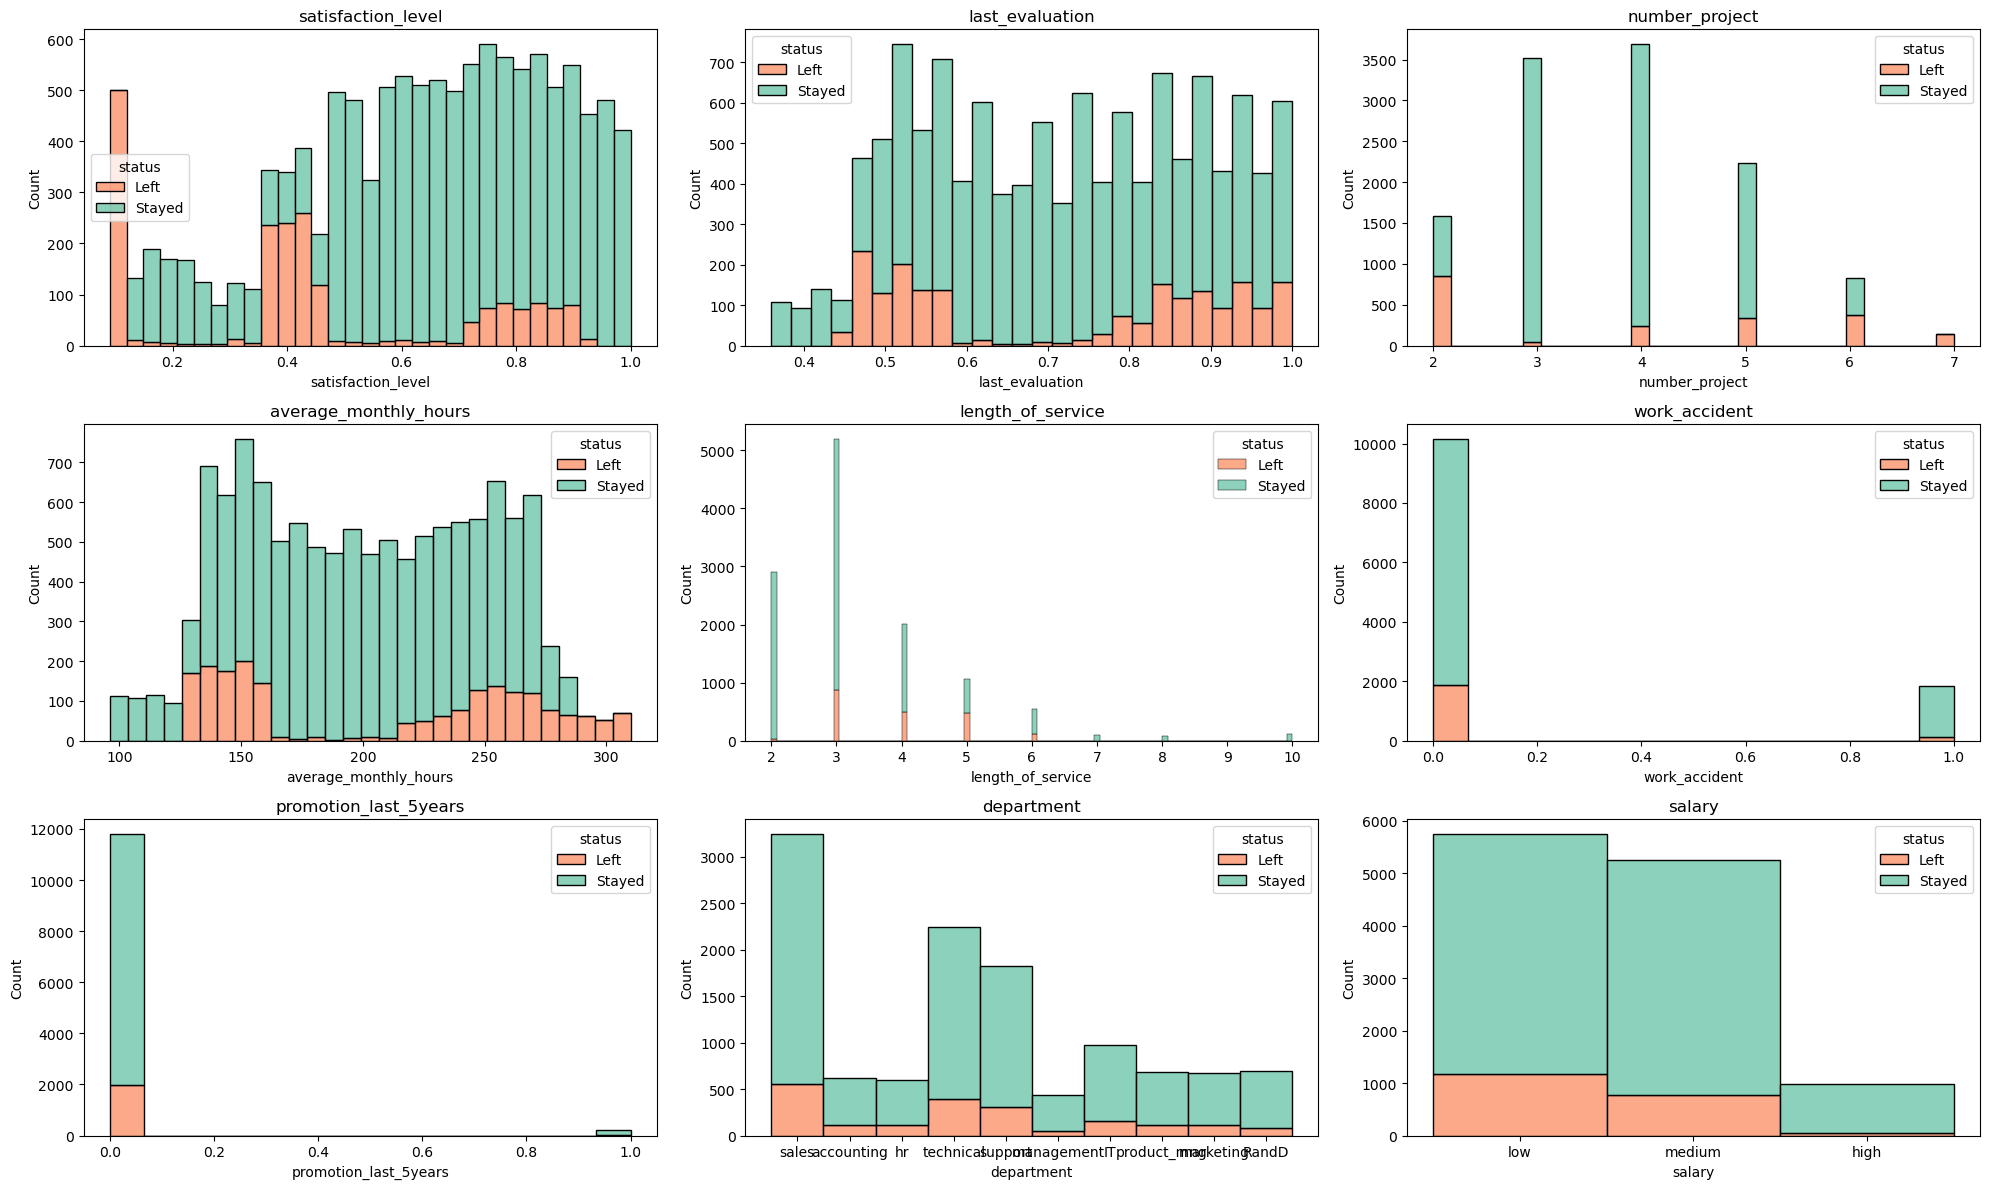

In [187]:
# quick data visualizations of each column with left status
num_columns =['satisfaction_level','last_evaluation','number_project','average_monthly_hours','length_of_service','work_accident','promotion_last_5years','department','salary']
fig,axes = plt.subplots(3,3,figsize=(20,12))
custom_labels_1_0 = ['Left','Stayed']
palette_code = 'Set2'

for idx,column in enumerate(num_columns):
    i = idx // 3 # index for row
    j = idx % 3  # index for col    
    sns.histplot(data= df, x=column,hue='left',palette=palette_code,kde=False,multiple='stack',ax=axes[i][j])
    axes[i][j].set_title(column)
    axes[i][j].legend(title='status', labels=custom_labels_1_0)

plt.tight_layout()
plt.show()

There are 2-3 groups of left in each chart. Each group might have different factor for leaving.

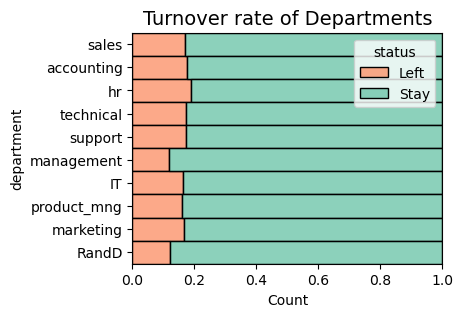

In [151]:
# left ratio of each department
# -> not a big difference between departments
plt.figure(figsize=(4,3))
sns.histplot(data= df, y='department',hue='left',palette=palette_code,kde=False,multiple='fill');
plt.legend(title='status', labels=custom_labels_1_0)
plt.title('Turnover rate of Departments', fontsize='14');

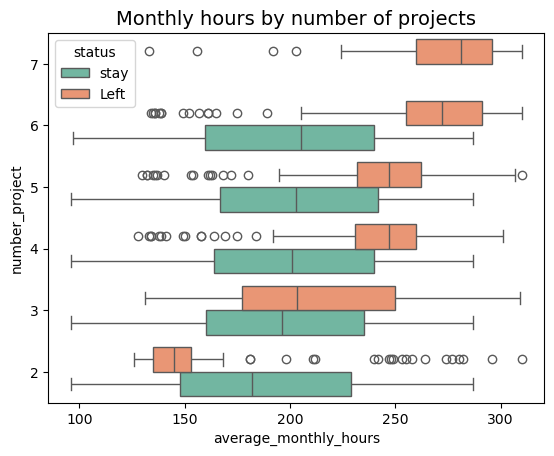

In [164]:
# number_project and average_monthly_hours
# -> Many projects leads long working hours and leaving
ax = sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h",palette=palette_code)
ax.invert_yaxis() # invert the y axis
plt.title('Monthly hours by number of projects', fontsize='14');
handles, _ = ax.get_legend_handles_labels()
custom_labels = ['stay', 'Left']
plt.legend(handles=handles, labels=custom_labels, title='status')
plt.show()

In [31]:
# correlation with each column
# convert to category
df.loc[:,'salary_int'] = df['salary'].map({'low':0,'medium':1,'high':2})
df['salary_int']

0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Name: salary_int, Length: 11991, dtype: int64

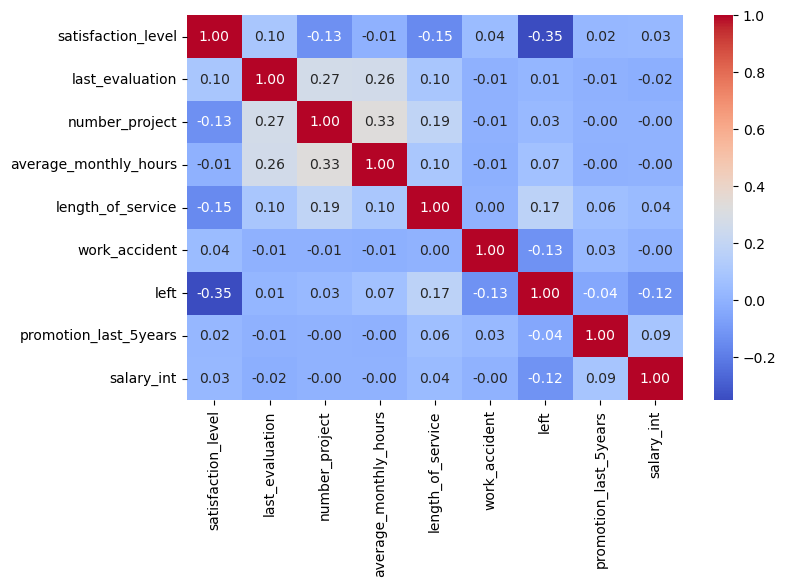

In [206]:
# heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.drop(columns={'salary','department'}).corr(),annot=True,fmt='.2f',cmap='coolwarm');

The heatmap above doesn't show strong relations within colums.
Satisfaction lavel and left has some relation.
It would be good to look deeper for satisfaction, number of project, average_monthly_hours, last_evaluation.

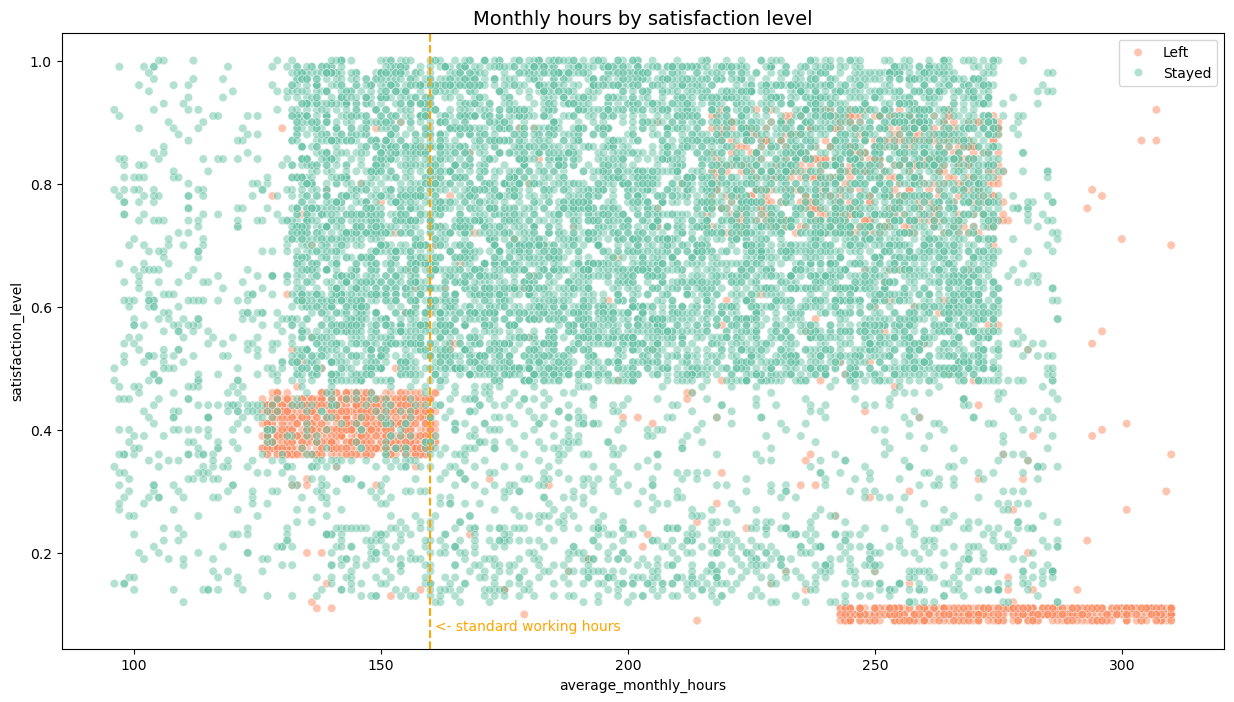

In [193]:
# average_monthly_hours versus satisfaction

# standard monthly hours:40 hours/week x average 4 workweeks/month = 160 work hours/month
st_hours_month = 160

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.5,palette=palette_code)
plt.axvline(x=st_hours_month, color='orange',ls='--')
plt.text(st_hours_month+1, plt.ylim()[0]+0.03,'<- standard working hours', color='orange') 
plt.legend(labels=custom_labels_1_0)
plt.title('Monthly hours by satisfaction level', fontsize='14');


Over 250 hours and left group is very low satisfaction. Another left group is below standard working hours.

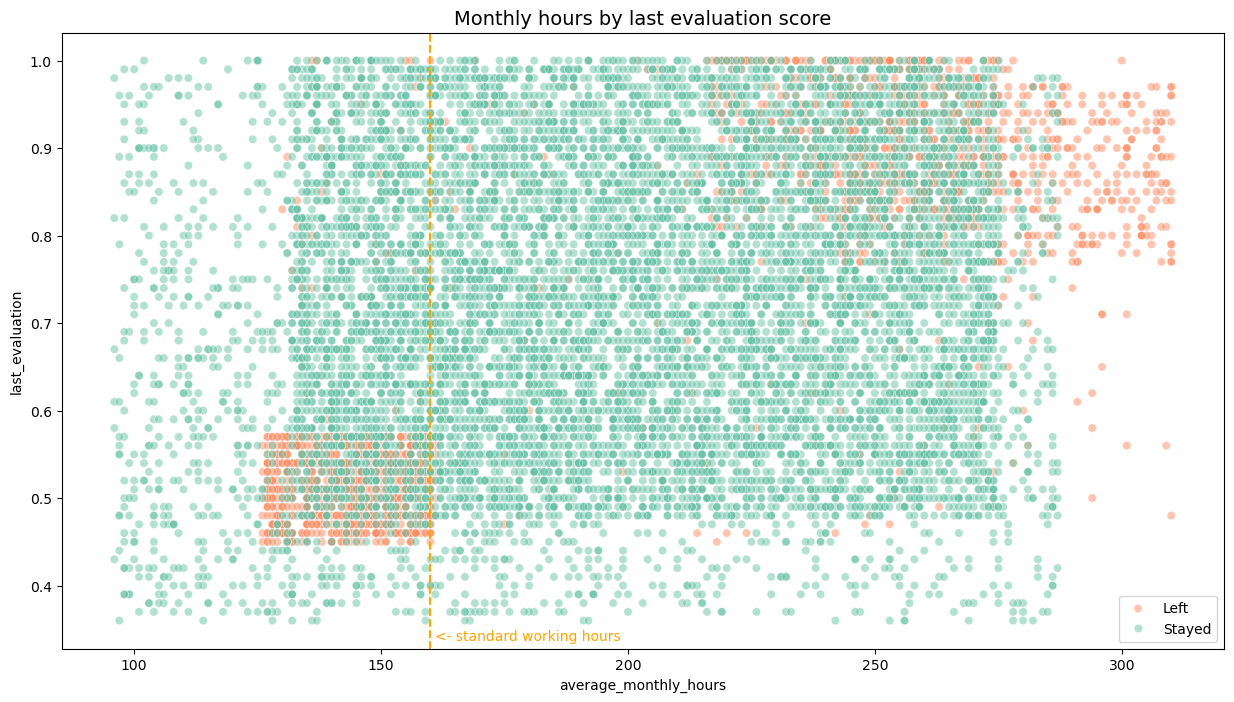

In [194]:
# average_monthly_hours versus last_evaluation
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5,palette=palette_code)
plt.axvline(x=st_hours_month, color='orange', ls='--')
plt.text(st_hours_month+1, plt.ylim()[0]+0.01,'<- standard working hours', color='orange') 
plt.legend(labels=custom_labels_1_0)
plt.title('Monthly hours by last evaluation score', fontsize='14');


Over 250 hours and left group gets good evaluation. Below standard working hours and left group gets lower evaluation. Evaluation system isself doesn't have a problem.

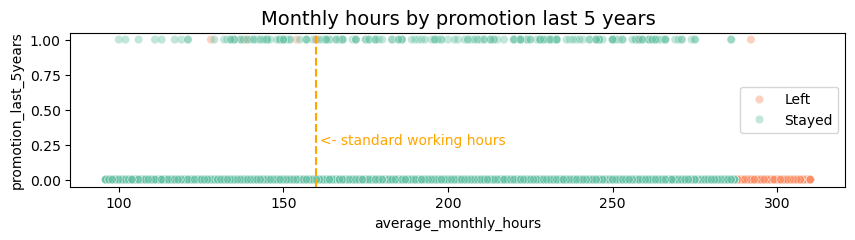

In [202]:
# average_monthly_hours versus promotion_last_5years
plt.figure(figsize=(10, 2))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4,palette=palette_code)
plt.axvline(x=st_hours_month, color='orange', ls='--')
plt.text(st_hours_month+1, plt.ylim()[0]+0.3,'<- standard working hours', color='orange') 
plt.legend(labels=custom_labels_1_0)
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot abobe clearly shows working around 300 hours and not promoted group is left.

## Insights

#################

# Construct phase in PACE strategy

Target variant is left column, which is a binary outcome: 0:stayed, 1:left
Build 2 models, logistic regression and xgboost, and compare the results.

In [246]:
# Data encoding
df_model = df.copy()
df_model = pd.get_dummies(df_model,columns=['department'],drop_first=True,dtype=int) # to avoid bool
df_model = df_model.drop(['salary'],axis=1)
df_model.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
length_of_service           int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary_int                  int64
department_RandD            int64
department_accounting       int64
department_hr               int64
department_management       int64
department_marketing        int64
department_product_mng      int64
department_sales            int64
department_support          int64
department_technical        int64
dtype: object

In [ ]:
# Model building

In [264]:
# Logistic Regression
# The data outcome balance is not equal as 1:left is 16.6%. 
# Try upsampling because the first result of logistic regression was not good score.

# data upsampling
df_majority = df_model[df_model['left']==0]
df_minority = df_model[df_model['left']==1]

len(df_majority),len(df_minority)

(10000, 1991)

In [265]:
# make the minority data to the same volume of the majority data
df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=0)

data_upsampled = pd.concat([df_majority,df_minority_upsampled]).reset_index(drop=True)
len(data_upsampled),data_upsampled.dtypes

(20000,
 satisfaction_level        float64
 last_evaluation           float64
 number_project              int64
 average_monthly_hours       int64
 length_of_service           int64
 work_accident               int64
 left                        int64
 promotion_last_5years       int64
 salary_int                  int64
 department_RandD            int64
 department_accounting       int64
 department_hr               int64
 department_management       int64
 department_marketing        int64
 department_product_mng      int64
 department_sales            int64
 department_support          int64
 department_technical        int64
 dtype: object)

In [266]:
y = data_upsampled['left']
X = data_upsampled.drop(columns = ['left'])
len(y),len(X)

(20000, 20000)

In [248]:
# no upsampling version
# y = df_model['left']
# X = df_model.drop(columns = ['left'])
# len(y),len(X)

(11991, 11991)

In [267]:
# split data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size = 0.2,random_state=0)
for x in [X_train,X_test,y_train,y_test]:
    print(len(x))

16000
4000
16000
4000


In [268]:
# LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=500).fit(X_train,y_train)

In [269]:
clf.coef_

array([[-4.55927511e+00,  1.19135230e+00, -4.49280708e-01,
         4.41791352e-03,  6.72679695e-01, -1.43871685e+00,
        -1.66921685e+00, -6.50198281e-01, -2.27126844e-01,
        -2.07747337e-02,  1.47463232e-02, -5.06182634e-01,
        -9.03196923e-02,  1.08828361e-01,  4.93121143e-02,
         6.81592618e-02,  6.56199400e-02]])

In [270]:
clf.intercept_

array([0.54274447])

In [271]:
pd.DataFrame(data={'Feature Name':X_train.columns,'Model Coefficient':clf.coef_[0]})

,Feature Name,Model Coefficient
0,satisfaction_level,-4.559275
1,last_evaluation,1.191352
2,number_project,-0.449281
3,average_monthly_hours,0.004418
4,length_of_service,0.672680
5,work_accident,-1.438717
6,promotion_last_5years,-1.669217
7,salary_int,-0.650198
8,department_RandD,-0.227127
9,department_accounting,-0.020775


In [272]:
y_pred = clf.predict(X_test)

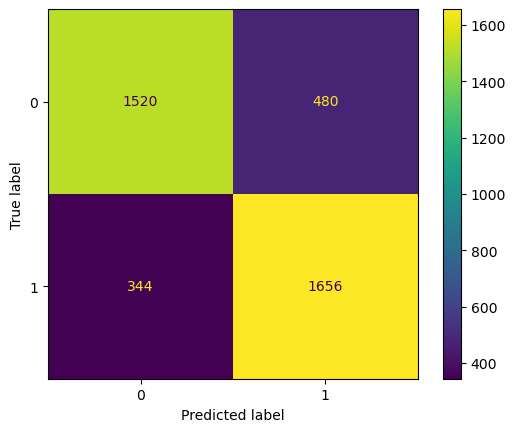

In [273]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot();

In [274]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2000
           1       0.78      0.83      0.80      2000

    accuracy                           0.79      4000
   macro avg       0.80      0.79      0.79      4000
weighted avg       0.80      0.79      0.79      4000



## ML randam forest/XGB in gridsearch cv

In [275]:
y = df_model['left']
X = df_model.drop(columns = ['left'])

In [279]:
# split data for train, validation, test
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [280]:
for x in [X_train, X_val, X_test]:
    print(len(x))

7194
2398
2399


# Modeling approach B-1: Tree-based Model(Ramdom forest & GridSearchCV)

In [286]:
# RandomForest
rf = RandomForestClassifier(random_state=42)

In [294]:
cv_params = {'max_depth': [5,10,15],
             'max_features': ['sqrt',0.3,0.6],
             'max_samples': [0.5,0.7],
             'min_samples_leaf': [2,4],
             'min_samples_split': [4,6],
             'n_estimators': [100,150],
             }
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [295]:
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [296]:
%%time
# When you refit with new parameters, comment out and run this code
# rf_cv.fit(X_train, y_train)

CPU times: user 4min 16s, sys: 0 ns, total: 4min 16s
Wall time: 4min 16s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 0.3, 0.6],
                         'max_samples': [0.5, 0.7], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [298]:
# When you refit rf_cv,  comment out and run this code
# save rf_cv to picle
# pickle.dump(rf_cv,open('rf_cv.sav','wb'))

In [299]:
# read saved pickle
rf_cv = pickle.load(open('rf_cv.sav','rb'))

In [300]:
# scores
rf_cv.best_score_
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 0.6,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 150}

In [301]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): model name for displaying the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy
        
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    # dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )
    return table


In [302]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.979383,0.905439,0.94066,0.981095


# Modeling approach B-2: Tree-based Model(XGB & GridSearchCV)

In [303]:
# Xgb
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [304]:
cv_params = {'max_depth': [5,10],
             'min_child_weight': [3, 5],
             'learning_rate': [0.1, 0.2,0.3],
             'n_estimators': [100,150]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [305]:
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [306]:
%%time
# When you refit with new parameters, comment out and run this code
# xgb_cv.fit(X_train, y_train)

CPU times: user 1min 27s, sys: 1.91 s, total: 1min 29s
Wall time: 14.2 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [5, 10],
                         'min_child_weight': [3, 5],
                         'n_estimators': [100, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [307]:
# When you refit xgb_cv,  comment out and run this code
# save xgb_cv to picle
# pickle.dump(xgb_cv,open('xgb_cv.sav','wb'))

In [308]:
# read saved pickle
xgb_cv = pickle.load(open('xgb_cv.sav','rb'))

In [309]:
xgb_cv.best_score_,xgb_cv.best_params_

(0.9104602510460251,
 {'learning_rate': 0.2,
  'max_depth': 5,
  'min_child_weight': 3,
  'n_estimators': 100})

In [310]:
results = pd.concat([results, make_results('XGB cv', xgb_cv, 'recall')], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.979383,0.905439,0.940660,0.981095
0,XGB cv,0.970017,0.910460,0.938978,0.980400


In [311]:
# prediction in rf
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [312]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.
    In:
        model_name (string): model name for the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [314]:
# validation in rf
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.979383,0.905439,0.940660,0.981095
0,XGB cv,0.970017,0.910460,0.938978,0.980400
0,RF val,0.978437,0.912060,0.944083,0.982068


In [315]:
# validation in xgb
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

In [316]:
results = pd.concat([results, get_test_scores('XGB val', xgb_val_preds, y_val)], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.979383,0.905439,0.940660,0.981095
0,XGB cv,0.970017,0.910460,0.938978,0.980400
0,RF val,0.978437,0.912060,0.944083,0.982068
0,XGB val,0.970745,0.917085,0.943152,0.981651


# Better model for test data

In [317]:
# RF shows better score than XGB. Use RF for test data

rf_test_preds = rf_cv.best_estimator_.predict(X_test)

In [318]:
results = pd.concat([results, get_test_scores('RF test', rf_test_preds, y_test)], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.979383,0.905439,0.940660,0.981095
0,XGB cv,0.970017,0.910460,0.938978,0.980400
0,RF val,0.978437,0.912060,0.944083,0.982068
0,XGB val,0.970745,0.917085,0.943152,0.981651
0,RF test,0.986595,0.924623,0.954604,0.985411


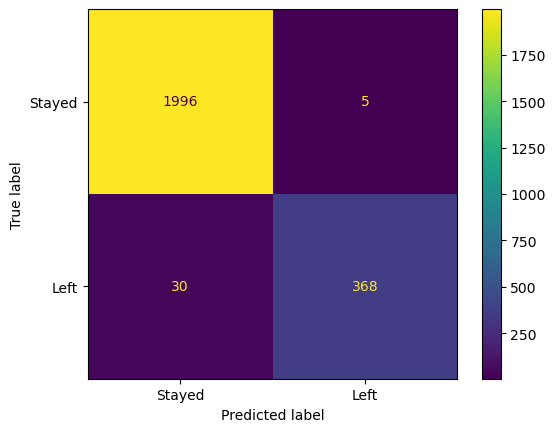

In [319]:
# Confusion matrix

cm = confusion_matrix(y_test, rf_test_preds, labels=rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Stayed', 'Left'])
disp.plot();

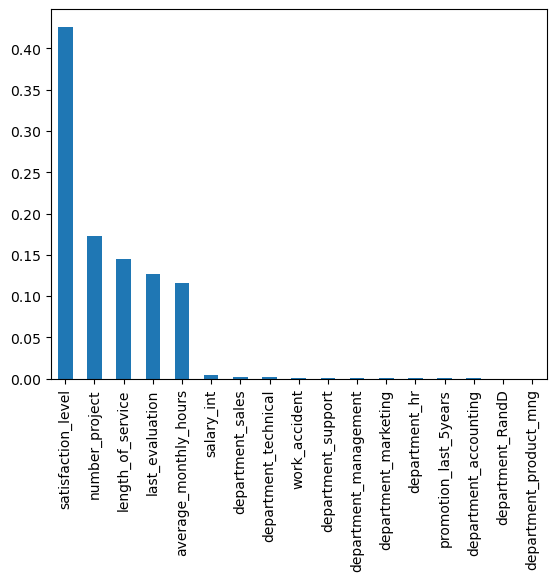

In [321]:
#
importance = pd.Series(rf_cv.best_estimator_.feature_importances_,index=X_test.columns).sort_values(ascending=False)
importance.plot.bar();